In [27]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [28]:
coinsHalfCent = coins[coins['Denom'] == 'HalfCent']
coinsHalfCent = coinsHalfCent[['Year', 'Mint_State', 'Value']]

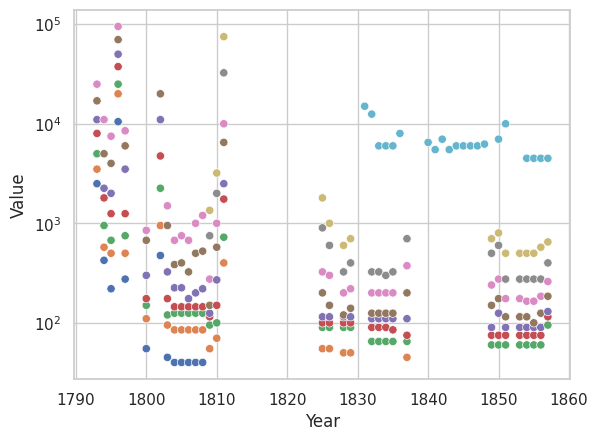

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsHalfCent, hue='Mint_State', legend=False)
plt.yscale('log')

In [30]:
import pandas as pd

df = pd.DataFrame(coinsHalfCent)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
     Year     Mint_State    Value
0    1793          AGood   2500.0
1    1793           Good   3500.0
2    1793          VGood   5000.0
3    1793           Fine   8000.0
4    1793          VFine  11000.0
5    1793          EFine  17000.0
6    1793  AUncirculated  25000.0
12   1794          EFine   5000.0
13   1794  AUncirculated  11000.0
19   1795          EFine   4000.0
20   1795  AUncirculated   7500.0
21   1796          AGood  10500.0
22   1796           Good  20000.0
23   1796          VGood  25000.0
24   1796           Fine  37500.0
25   1796          VFine  50000.0
26   1796          EFine  70000.0
27   1796  AUncirculated  95000.0
32   1797          VFine   3500.0
33   1797          EFine   6000.0
34   1797  AUncirculated   8500.0
45   1802           Fine   4750.0
46   1802          VFine  11000.0
47   1802          EFine  20000.0
105  1810    MintState63   3200.0
109  1811          VFine   2500.0
110  1811          EFine   6500.0
111  1811  AUnc

In [31]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([  0,   1,   2,   3,   4,   5,   6,  12,  13,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  32,  33,  34,  45,  46,  47, 105, 109,
       110, 111, 112, 113, 146, 153, 160, 167, 174, 175, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 206, 214, 229, 237, 245, 253])

In [32]:
for i in indicies:
  coinsHalfCent = coinsHalfCent.drop(i)

In [33]:
coinsHalfCent

,Year,Mint_State,Value
7,1794,AGood,425.0
8,1794,Good,575.0
9,1794,VGood,950.0
10,1794,Fine,1800.0
11,1794,VFine,2250.0
...,...,...,...
248,1857,VFine,130.0
249,1857,EFine,185.0
250,1857,AUncirculated,260.0
251,1857,MintState60,400.0


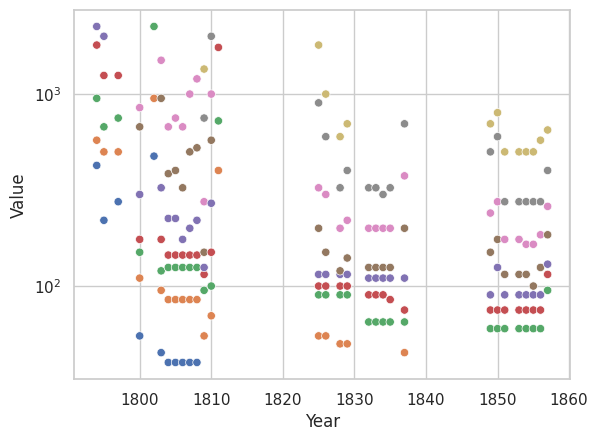

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsHalfCent, hue='Mint_State', legend=False)
plt.yscale('log')

In [35]:
from sklearn.preprocessing import LabelEncoder
lencMS = LabelEncoder()
coinsHalfCent["Mint_State"] = lencMS.fit_transform(coinsHalfCent["Mint_State"])
coinsHalfCent["Mint_State"]

7      0
8      4
9      8
10     3
11     7
      ..
248    7
249    2
250    1
251    5
252    6
Name: Mint_State, Length: 203, dtype: int64

In [36]:
coinsHalfCent['log_Value'] = np.log(coinsHalfCent['Value'])

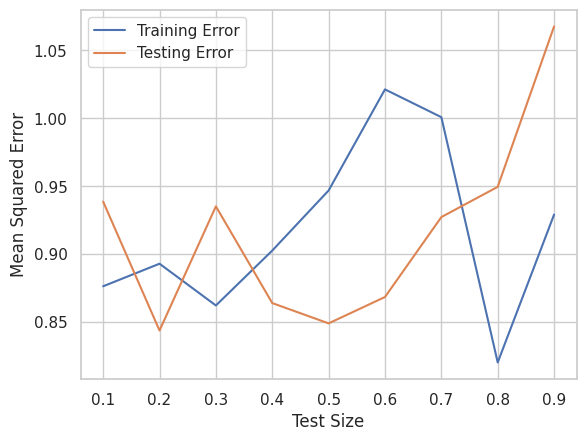

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsHalfCent.iloc[:,0:2]
y = coinsHalfCent.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = coinsHalfCent.iloc[:,0:2]
Y = coinsHalfCent.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=0)

In [39]:
X

,Year,Mint_State
7,1794,0
8,1794,4
9,1794,8
10,1794,3
11,1794,7
...,...,...
248,1857,7
249,1857,2
250,1857,1
251,1857,5


In [40]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [41]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [42]:
mseModel1

46378.597828265556

In [43]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.01462967 -0.01239627]
Intercept: 32.05310965922324


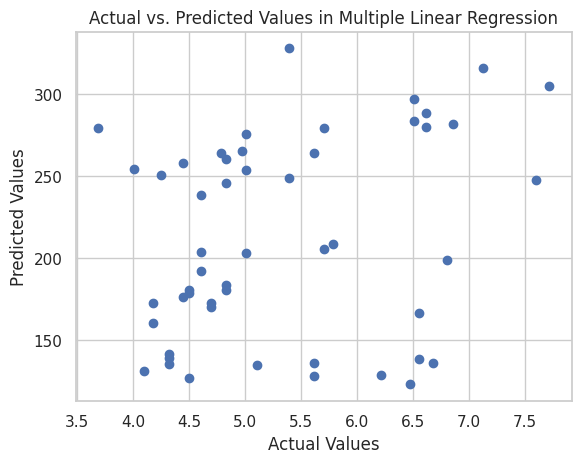

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

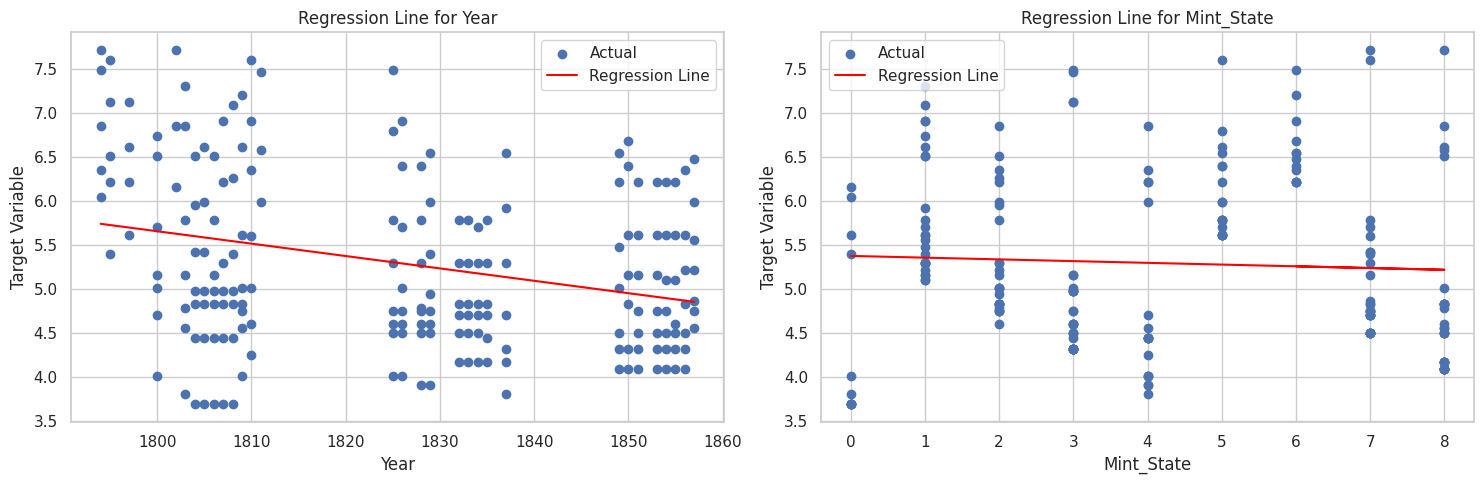

In [45]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [46]:
coinsHalfCent[coinsHalfCent['Mint_State'] == 7]

,Year,Mint_State,Value,log_Value
11,1794,7,2250.0,7.718685
18,1795,7,2000.0,7.600902
39,1800,7,300.0,5.703782
52,1803,7,325.0,5.783825
59,1804,7,225.0,5.416100
66,1805,7,225.0,5.416100
73,1806,7,175.0,5.164786
80,1807,7,200.0,5.298317
87,1808,7,220.0,5.393628
93,1809,7,125.0,4.828314


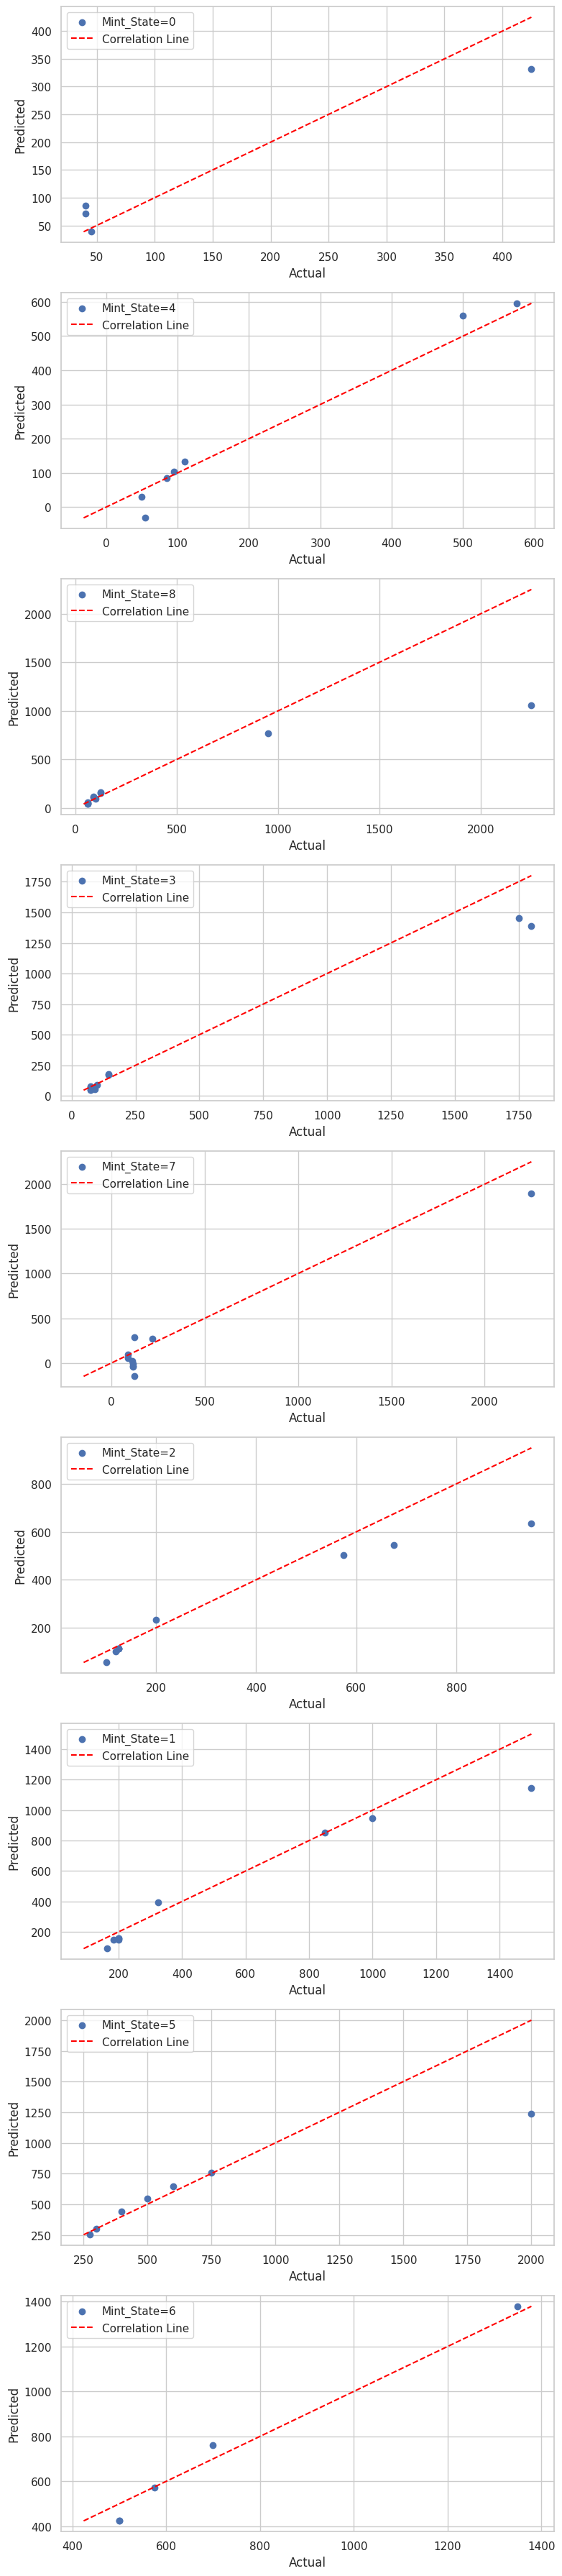

In [47]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsHalfCent.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsHalfCent['Value']  # Specify the column name of your target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsHalfCent[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsHalfCent[coinsHalfCent[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

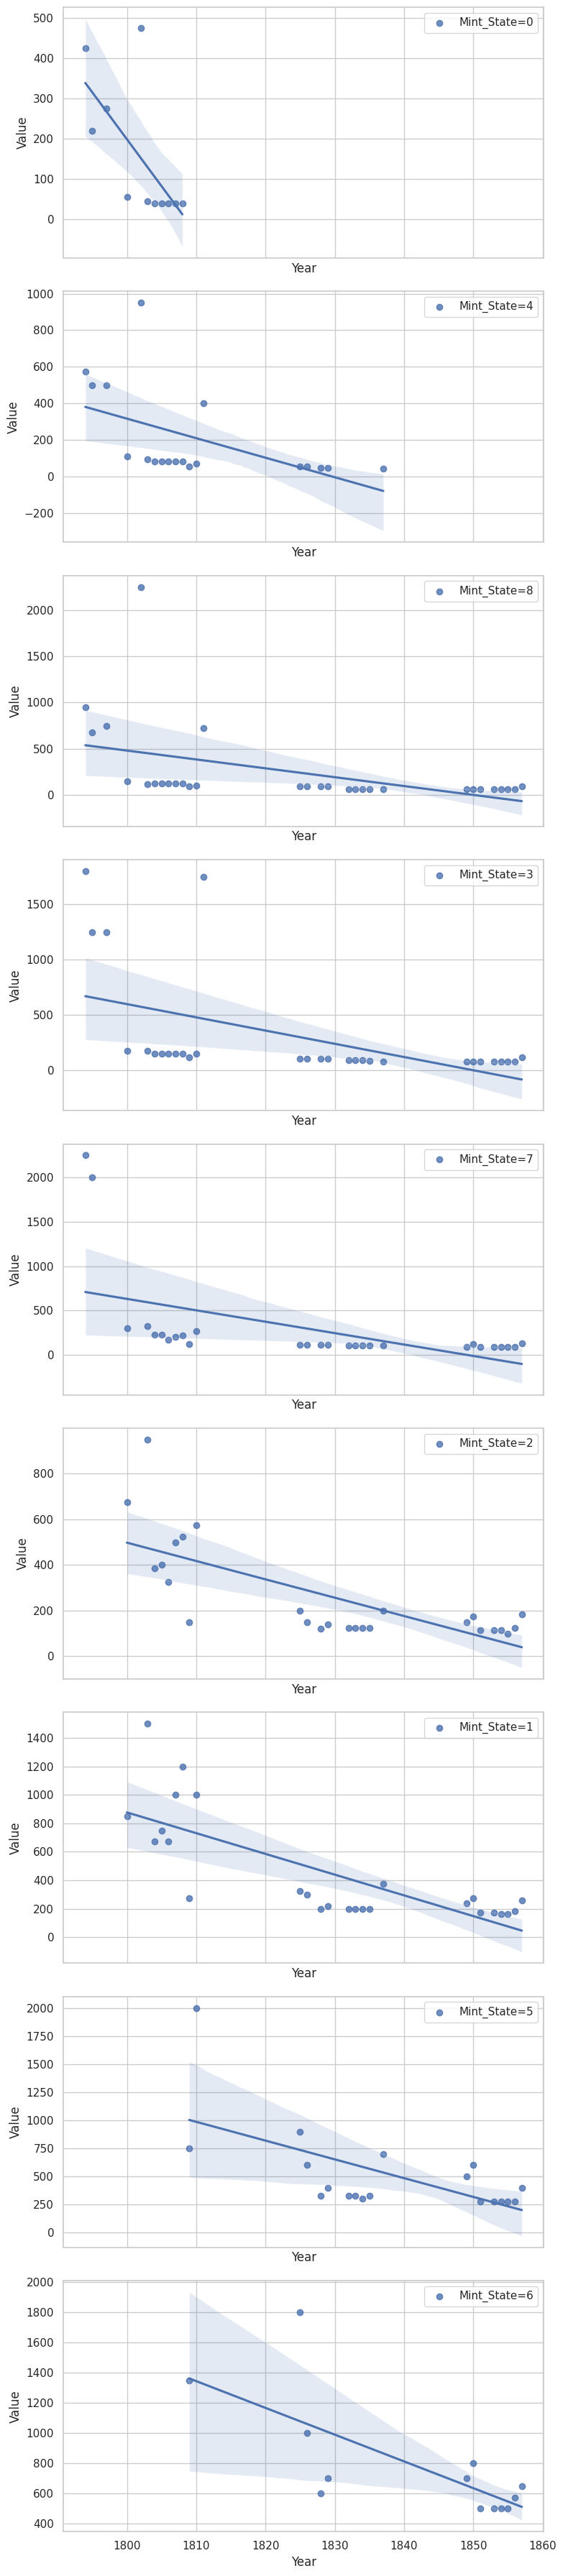

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsHalfCent[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsHalfCent[coinsHalfCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.669339  -0.785647
Mint_State       NaN         NaN       NaN        NaN
Value      -0.669339         NaN  1.000000   0.974713
log_Value  -0.785647         NaN  0.974713   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.529582  -0.685993
Mint_State       NaN         NaN       NaN        NaN
Value      -0.529582         NaN  1.000000   0.953097
log_Value  -0.685993         NaN  0.953097   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.462978  -0.700497
Mint_State       NaN         NaN       NaN        NaN
Value      -0.462978         NaN  1.000000   0.899190
log_Value  -0.700497         NaN  0.899190   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.513028  -0.682663
Mint_State       NaN         NaN       NaN        NaN
Value      -0.513028        

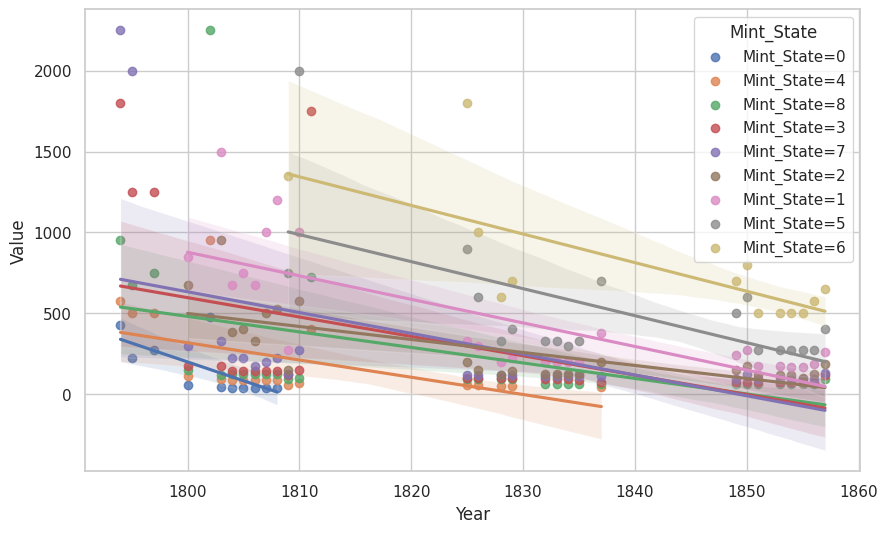

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsHalfCent[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsHalfCent[coinsHalfCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [50]:
overall_correlation_matrix = coinsHalfCent.corr()
overall_correlation_matrix

,Year,Mint_State,Value,log_Value
Year,1.000000,0.109166,-0.337128,-0.295284
Mint_State,0.109166,1.000000,0.016825,-0.051684
Value,-0.337128,0.016825,1.000000,0.876904
log_Value,-0.295284,-0.051684,0.876904,1.000000


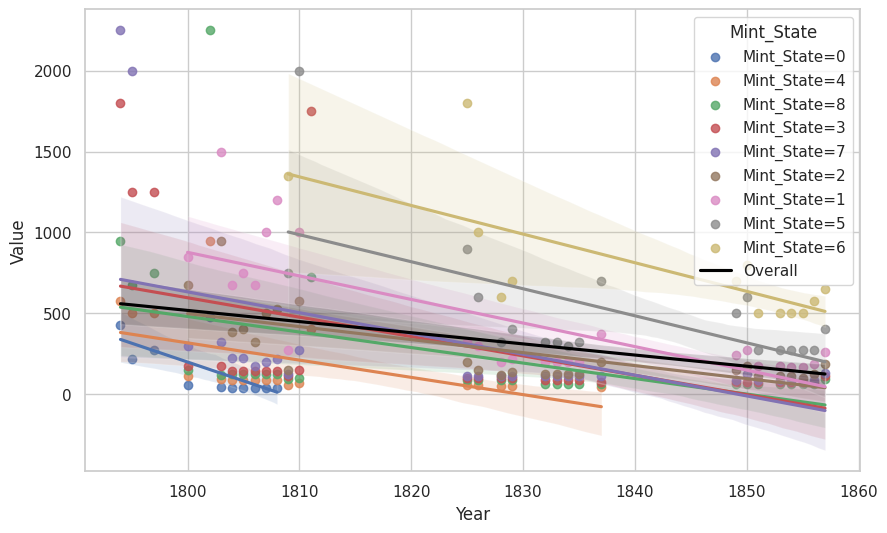

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsHalfCent[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsHalfCent[coinsHalfCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsHalfCent[attribute_column], y=coinsHalfCent[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

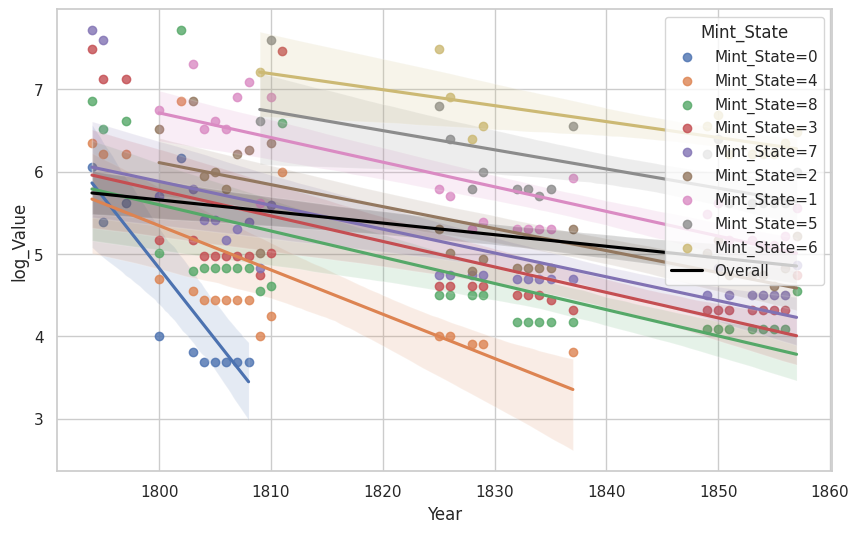

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'log_Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsHalfCent[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsHalfCent[coinsHalfCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsHalfCent[attribute_column], y=coinsHalfCent[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()